In [2]:
# read in already cleaned/matched data from previous code do this once to generate necessary files. T1 matrix csv file still needed from previous code,

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML




display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")
path = os.getcwd()
filepath=os.getcwd()
files = os.listdir(u'.')

print("\n\n")

print("\n\n")
k=1

files = [f for f in files if f[-3:] == 'txt']

print(files)


for i in range(len(files)):
    
    filename = files[i]
    print("Filename : " +str(filename))
    print("File Path : " + str(path))

    
    num_lines = sum(1 for line in open(filename))
    f=open(filename,"r")


    print("Total Lines in File : " +str(num_lines))
    #print("\n\n")
  
    lines=f.readlines()
    
    
    if(k==4):
        class4 = np.loadtxt(lines, delimiter=',')
        k=5
    
    if(k==3):
        class3 = np.loadtxt(lines, delimiter=',')
        k=4
    
    if(k==2):
        class2 = np.loadtxt(lines, delimiter=',')
        k=3
    
    if(k==1):
        class1 = np.loadtxt(lines, delimiter=',')
        k=2
                        
    f.close()

    

albanian = class1.T  # FRENCH
greek = class2.T     #GREEK
japanese=class3.T    #IRANIAN
korean=class4.T      #SPANISH
np.savetxt("albanian.csv", albanian, delimiter=",")
np.savetxt("greek.csv", greek, delimiter=",")
np.savetxt("japanese.csv", japanese, delimiter=",")
np.savetxt("korean.csv", korean, delimiter=",")
print(np.shape(greek))
print(np.shape(albanian))
print(np.shape(japanese))
print(np.shape(korean))

#Load T1_Statistic Matrix

t1_matrix = np.loadtxt("t1_matrix.csv", delimiter=',')
p.pprint(t1_matrix)

disim_matrix = np.zeros((len(t1_matrix), len(t1_matrix)), dtype= float)


for i in range(len(t1_matrix)):
   
    for j in range(len(t1_matrix[i])):

        disim_matrix[i][j] = 1 - t1_matrix[i][j]

print(disim_matrix)
np.savetxt("disim_matrix.csv", disim_matrix, delimiter=",")

for i in range(len(disim_matrix)):
   
    for j in range(len(disim_matrix[i])):

        disim_matrix[i][j] = np.var(disim_matrix[i] - disim_matrix[j])

print(disim_matrix)
np.savetxt("disim_matrix2.csv", disim_matrix, delimiter=",")

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

num_ind = greeklabels+albanianlabels+japaneselabels+koreanlabels



combined_data=np.vstack((albanian,greek,japanese,korean))
np.savetxt("combined_data.csv", combined_data, delimiter=",")








['Albanian_Region_Data_Cleaned_&_Matched.txt', 'greek_Region_Data_Cleaned_&_Matched.txt', 'Japanese_Region_Data_Cleaned_&_Matched.txt', 'Korean_Region_Data_Cleaned_&_Matched.txt']
Filename : Albanian_Region_Data_Cleaned_&_Matched.txt
File Path : C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets
Total Lines in File : 531002
Filename : greek_Region_Data_Cleaned_&_Matched.txt
File Path : C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets
Total Lines in File : 531002
Filename : Japanese_Region_Data_Cleaned_&_Matched.txt
File Path : C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets
Total Lines in File : 531002
Filename : Korean_Region_Data_Cleaned_&_Matched.txt
File Path : C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets
Total Lines in File : 531002
(20, 531002)
(6, 531002)
(29, 531002)
(6, 531002)
array([[1.        , 0.66520867, 0.66177538, ..., 0.54253207, 0.53594239, 0.53375847],
       [0.66520867, 1.        , 0.66391869, ..., 0.53653059, 0.53185671, 0.5351


Shape of Combined Data is (61, 531002)




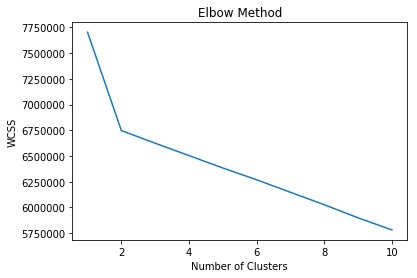

Specify number of clusters to be used 4

Cluster Assignments Are: 

[2 3 2 3 2 2 2 2 2 2 3 2 0 2 0 0 2 3 0 0 2 0 2 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
 Adjusted Random Score : 0.5920369435246682
Adjusted Random Score As Percentage Is : 79.6018471762334


In [3]:
#Perform a K-Means Cluster on Combined Data no PCA reduction
#normalization found to reduce clustering accuracy and is not needed for SNP data

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score



display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")

albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))
#combined_data = StandardScaler().fit_transform(combined_data)  
print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]
Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
#Y represents true class assignments from Data
np.savetxt("Y.csv", Y, delimiter=",")



wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(combined_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(combined_data)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))




Shape of Combined Data is (61, 531002)


Shape of Y is (61, 1)


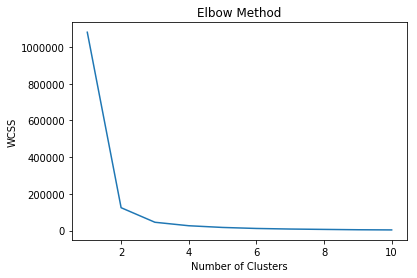

Specify number of clusters to be used 4

Cluster Assignments Are: 

[2 3 1 1 1 1 3 1 3 3 2 1 1 2 2 2 3 3 1 2 1 2 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Clustering accuracy is : 24.59016393442623
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.5810758351722191
Adjusted Random Score As Percentage Is : 79.05379175861096
<class 'numpy.ndarray'>
(61,)
<class 'numpy.ndarray'>
(61, 1)


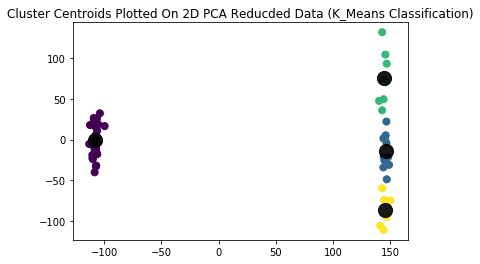

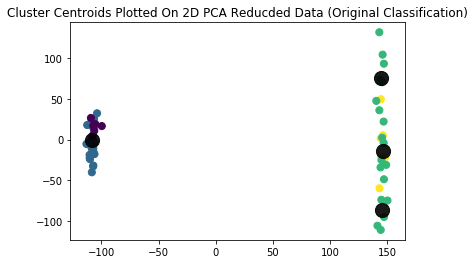

In [6]:
#cluster the 2 component pca reduced data

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score

albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
print("Shape of Y is " + str(np.shape(Y)))
#Y represents true class assignments from Data





#combined_data = StandardScaler().fit_transform(combined_data)  
 
#this is the covariance matrix  pca = PCA(n_components=61)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(combined_data)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


Y_P = np.reshape(Y, (num_ind, ))

print(type(pred_y))
print(np.shape(pred_y))
print(type(Y))
print(np.shape(Y))

plt.title("Cluster Centroids Plotted On 2D PCA Reducded Data (K_Means Classification)")
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=pred_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
plt.show()

plt.title("Cluster Centroids Plotted On 2D PCA Reducded Data (Original Classification)")
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=Y_P, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
plt.show()






Shape of Combined Data is (61, 531002)


Shape of Y is (61, 1)


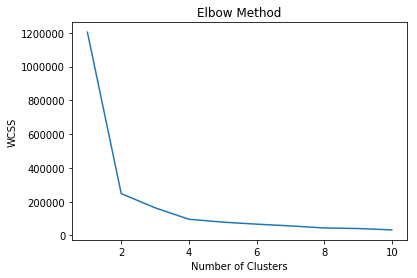

Specify number of clusters to be used 4

Cluster Assignments Are: 

[3 2 2 2 2 3 2 2 3 2 2 2 3 3 3 3 1 1 3 3 3 2 1 1 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Clustering accuracy is : 22.950819672131146
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.5886626301444465
Adjusted Random Score As Percentage Is : 79.43313150722233


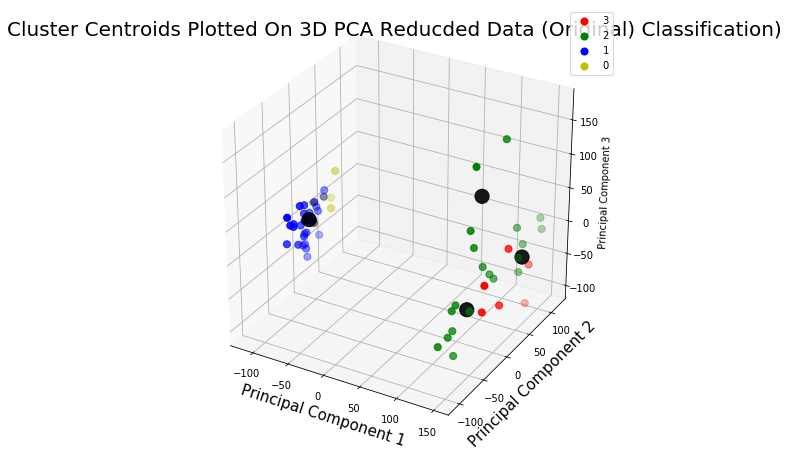

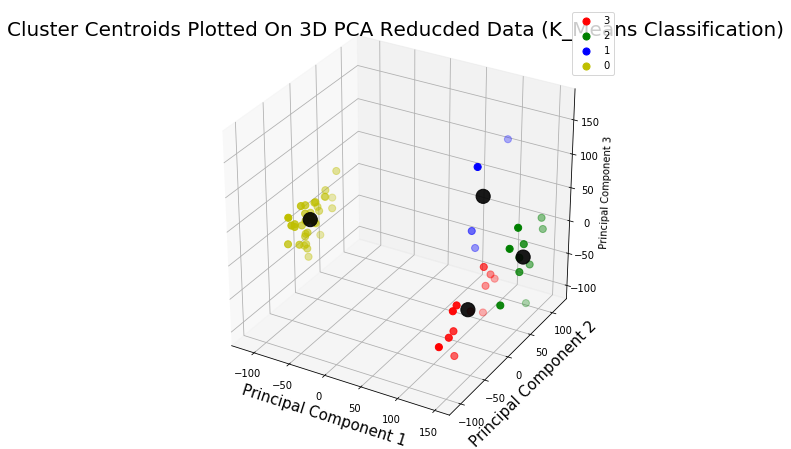

In [7]:
#cluster the 3 component pca reduced data 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score

albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
print("Shape of Y is " + str(np.shape(Y)))
#Y represents true class assignments from Data





#combined_data = StandardScaler().fit_transform(combined_data)  
 
#this is the covariance matrix  pca = PCA(n_components=61)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(combined_data)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))



#Y_P = np.reshape(Y, (num_ind, ))

centers = kmeans.cluster_centers_

Y_P = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 

#pred_yp= pred_yp.astype(float)
#print(np.shape(Y))

#print(type(Y))

#print(np.shape(pred_yp))
#print(type(pred_yp))

#print(Y)
#print(pred_yp)
#print(Y[0])
#print(pred_yp[0])
#print(type(Y[1]))

#print(type(pred_yp[1]))

#pred_list = pred_y.tolist()
#pred_list = [int(i) for i in pred_list]

finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()




Shape of Combined Data is (61, 531002)


Shape of Y is (61, 1)


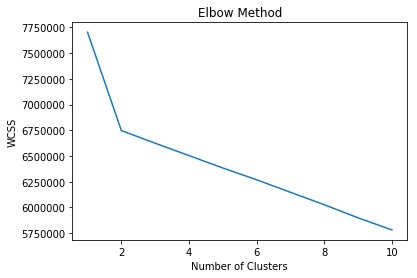

Specify number of clusters to be used 4

Cluster Assignments Are: 

[2 3 2 3 2 2 2 2 2 2 3 2 0 2 0 0 2 3 0 0 2 0 2 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Clustering accuracy is : 65.57377049180327
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.5920369435246682
Adjusted Random Score As Percentage Is : 79.6018471762334


In [8]:
#Max Component PCA & Cluster
#this resulted in the same accuracy as a cluster with no PCA reduction using all features(SNPS) of the individuals

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score

albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]


greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
print("Shape of Y is " + str(np.shape(Y)))
#Y represents true class assignments from Data





#combined_data = StandardScaler().fit_transform(combined_data)  
 
#this is the covariance matrix  pca = PCA(n_components=61)
pca = PCA(n_components = num_ind)
principalComponents = pca.fit_transform(combined_data)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))





Shape of Combined Data is (35, 531002)



Shape of Combined Data 2 is (26, 531002)


Shape of Y is (35, 1)
Shape of Y2 is (26, 1)


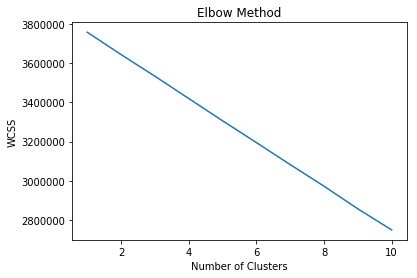

Specify number of clusters to be used 2

Cluster Assignments Are: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Clustering accuracy is : 20.0
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : -0.04191980558930718
Adjusted Random Score As Percentage Is : 47.90400972053464


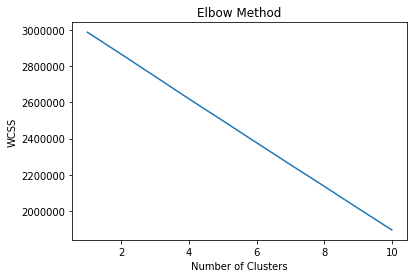

Specify number of clusters to be used 2

Cluster Assignments Are: 

[1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1]


Clustering accuracy is : 57.692307692307686
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : -0.011315417256011274
Adjusted Random Score As Percentage Is : 49.43422913719944


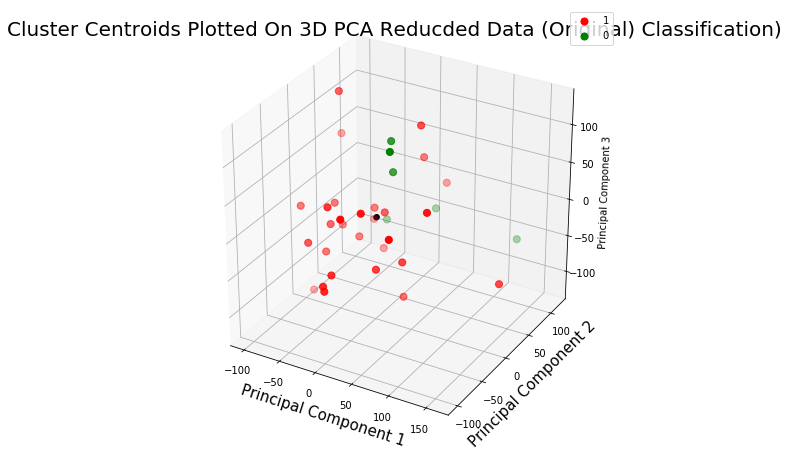

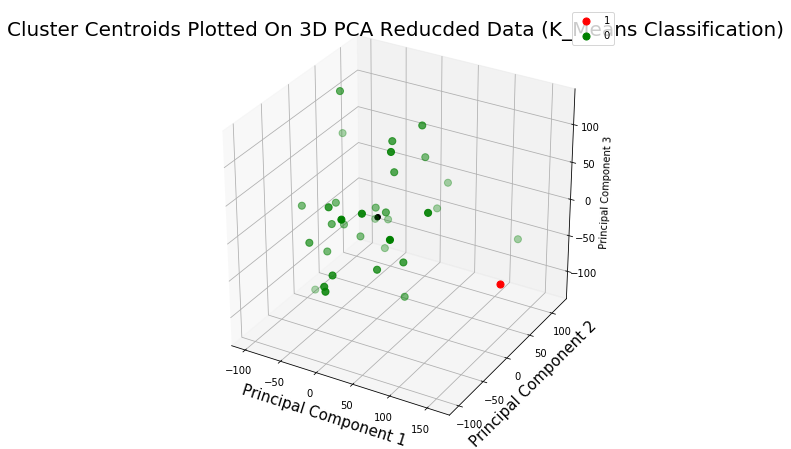

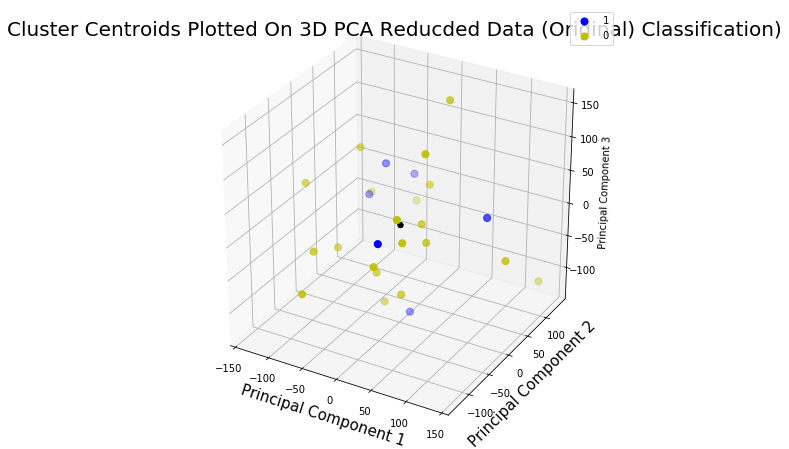

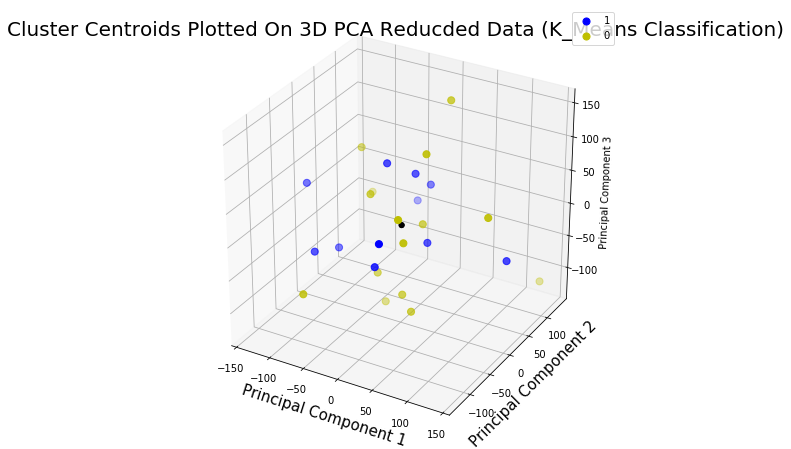

In [11]:
#double cluster the two Regions
#then PCA reduce and show original vs cluster assignments

#this shows that k-means has significant issues trying to cluster individuals in the same or similar population
#the majority of genetic variation occurs within populations and this can be shown by the wccs graph never really elbowing out and arriving at a good clustering solution

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score



japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
albanian = np.loadtxt("albanian.csv", delimiter=',')

combined_data=np.vstack((japanese,korean))
combined_data2=np.vstack((albanian,greek))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

print("\nShape of Combined Data 2 is " + str(np.shape(combined_data2)))
print("\n")


num_ind = combined_data.shape[0]
num_ind2 = combined_data2.shape[0]

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
Y2 = np.vstack ((np.ones((albanianlabels,1)),np.zeros((greeklabels,1))))
print("Shape of Y is " + str(np.shape(Y)))
print("Shape of Y2 is " + str(np.shape(Y2)))
#Y represents true class assignments from Data


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(combined_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(combined_data)
centers = kmeans.cluster_centers_
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(combined_data2)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans2 = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans2.fit_predict(combined_data2)
centers2 = kmeans2.cluster_centers_
print("\nCluster Assignments Are: \n\n"+ str(pred_y2) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y2)):
    test_equality  = np.equal(Y2[i], pred_y2[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind2)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y2.reshape(len(pred_y2), ), kmeans2.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(combined_data)
principalComponents2 = pca.fit_transform(combined_data2)



Y = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 



finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()


Y2 = pd.DataFrame(Y2, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y2[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp2 = pred_y2.reshape(num_ind2,1)
pred_yp2 = pd.DataFrame(pred_yp2, columns=['target']) 



finalDf = pd.concat([principalDf, pred_yp2[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()







Shape of Combined Data is (35, 531002)



Shape of Combined Data 2 is (26, 531002)


Shape of Y is (35, 1)
Shape of Y2 is (26, 1)


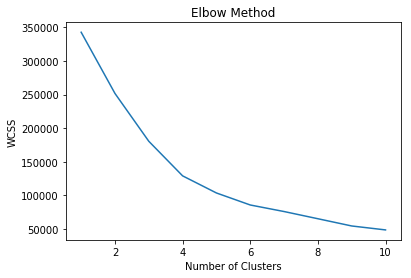

Specify number of clusters to be used 2

Cluster Assignments Are: 

[1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0]


Clustering accuracy is : 65.71428571428571
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.06771578445398192
Adjusted Random Score As Percentage Is : 53.385789222699096


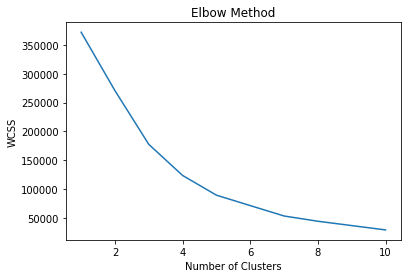

Specify number of clusters to be used 2

Cluster Assignments Are: 

[0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0]


Clustering accuracy is : 46.15384615384615
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : -0.02477477477477486
Adjusted Random Score As Percentage Is : 48.761261261261254


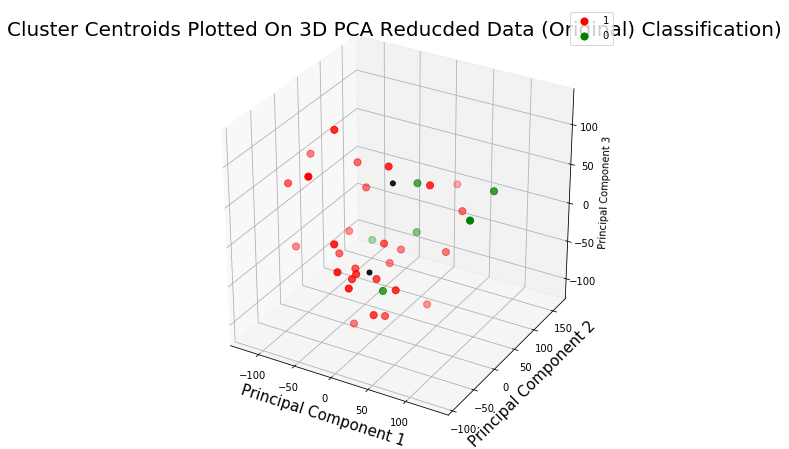

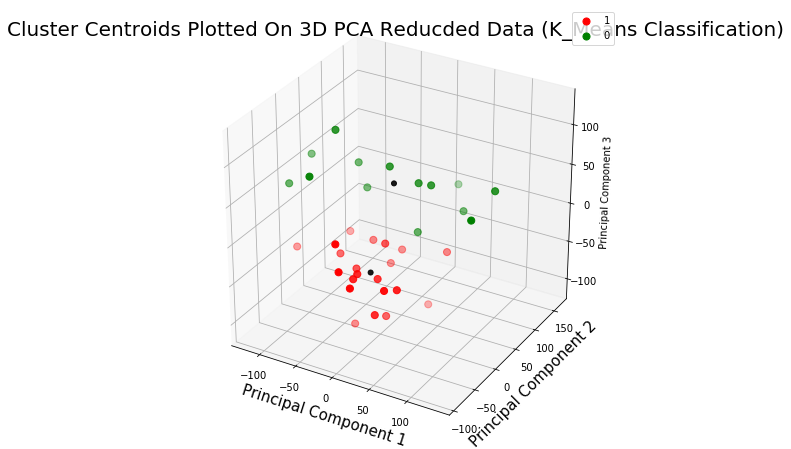

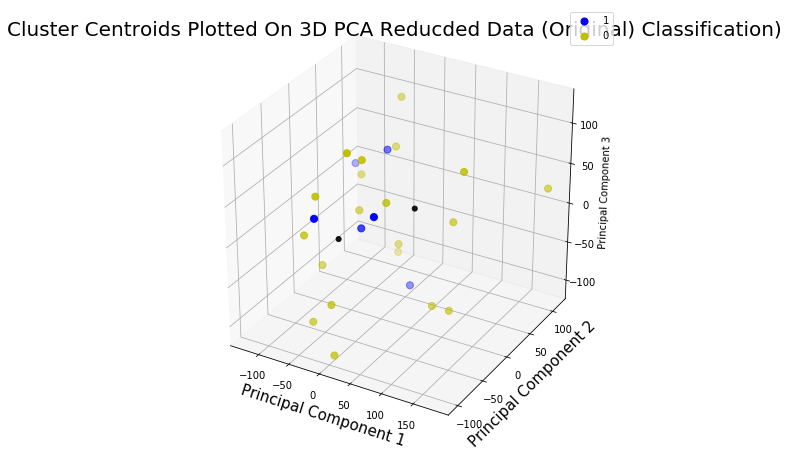

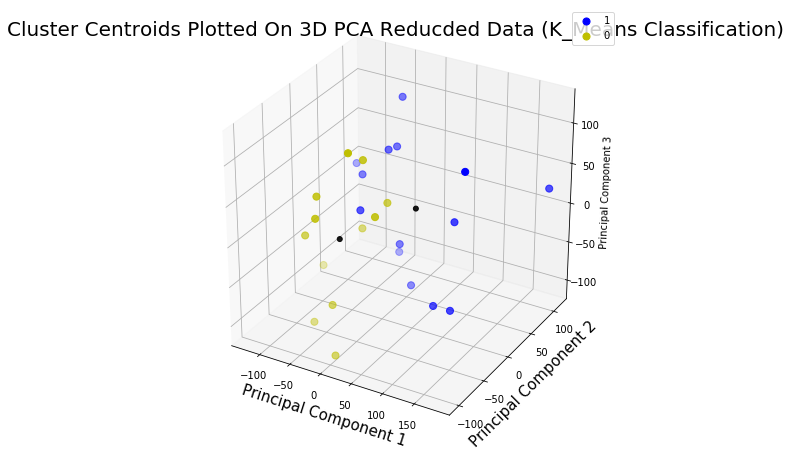

In [12]:
#try double clustering but pca reduce the data first
#this shows that pca reduction greatly helps the k-means correctly cluster very similar populations such as japanese and korean

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML
from sklearn.metrics import adjusted_rand_score


japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
albanian = np.loadtxt("albanian.csv", delimiter=',')

combined_data=np.vstack((japanese,korean))
combined_data2=np.vstack((albanian,greek))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

print("\nShape of Combined Data 2 is " + str(np.shape(combined_data2)))
print("\n")


num_ind = combined_data.shape[0]
num_ind2 = combined_data2.shape[0]

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
Y2 = np.vstack ((np.ones((albanianlabels,1)),np.zeros((greeklabels,1))))
print("Shape of Y is " + str(np.shape(Y)))
print("Shape of Y2 is " + str(np.shape(Y2)))
#Y represents true class assignments from Data

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(combined_data)
principalComponents2 = pca.fit_transform(combined_data2)


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
centers = kmeans.cluster_centers_
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))


ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(principalComponents2)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans2 = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans2.fit_predict(principalComponents2)
centers2 = kmeans2.cluster_centers_
print("\nCluster Assignments Are: \n\n"+ str(pred_y2) + "\n")

tcorrect_counter = 0

for i in range(len(pred_y2)):
    test_equality  = np.equal(Y2[i], pred_y2[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind2)*100    

print("\nClustering accuracy is : " + str(test_accuracy))


ari_kmeans = adjusted_rand_score(Y2.reshape(len(pred_y2), ), kmeans2.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


Y = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 



finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()


Y2 = pd.DataFrame(Y2, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y2[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp2 = pred_y2.reshape(num_ind2,1)
pred_yp2 = pd.DataFrame(pred_yp2, columns=['target']) 



finalDf = pd.concat([principalDf, pred_yp2[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [1,0]
colors = ['b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], c='black', s=25, alpha=0.9);
ax.legend(targets)
ax.grid()




In [ ]:
#since none of these clustering solutions give a good clustering finding the centroids and doing a pca of the centorids and then projecting the points wont work 
#previously in my code i was able to get good results from splitting into two clusters but this was an error in how I was reading the SNP data
#one thing that maybe could be attempted here is to find the center based on the distances of each population based on the original labelibg.

#Then pca reduce these centroid points and then project the original points

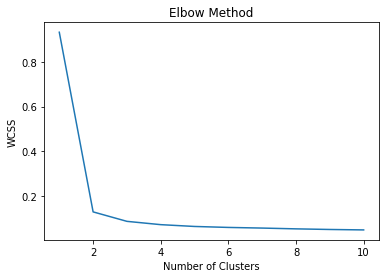

Specify number of clusters to be used 4

Cluster Assignments Are: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Clustering accuracy is : 18.0327868852459
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.43471105976612173
Adjusted Random Score As Percentage Is : 71.73555298830608


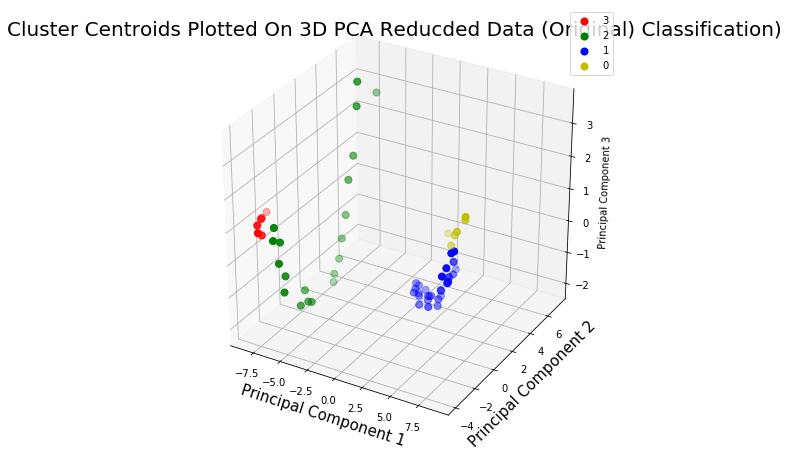

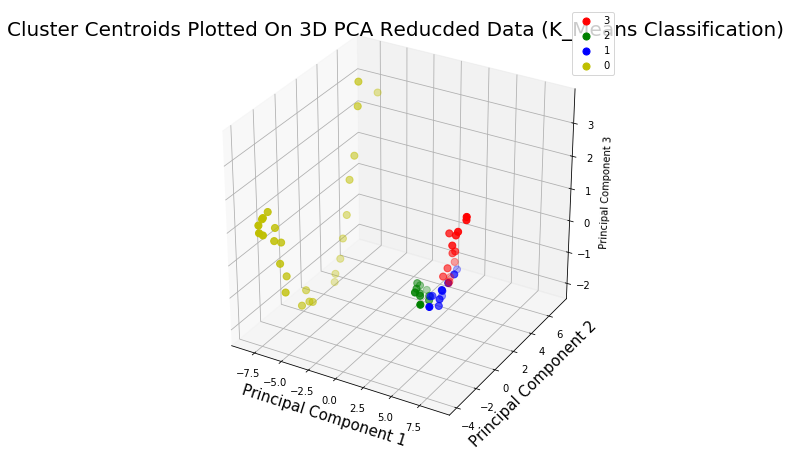

In [22]:
#https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003480
#the paper above claims that this distance matrix transformation reduces the genetic variation within populations
#we have seen from the above code that the 61x61 pca reduction resulted in the same clustering accuracy as just the clustering with no pca reduction
#this leads me to believe that the 61x61 distance matrix will have enough features to get good accuracy as accuracy dropped when pca reducing to 2 or 3 components.

from sklearn.metrics import adjusted_rand_score
import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML


disim_matrix = np.loadtxt("disim_matrix2.csv", delimiter=",")

display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")



num_ind = disim_matrix.shape[0]


Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
#Y = np.vstack ((np.zeros((albanianlabels,1)), np.ones((greeklabels,1)),2*np.ones((japaneselabels,1)),3*np.ones((koreanlabels,1))))



wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(disim_matrix)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(disim_matrix)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")


tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))

disim_matrix = StandardScaler().fit_transform(disim_matrix) 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(disim_matrix)

centers = StandardScaler().fit_transform(centers) 
centers = pca.fit_transform(centers)

centers = kmeans.cluster_centers_

Y_P = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
#ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 


finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
#ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()




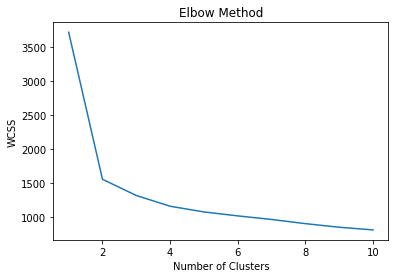

Specify number of clusters to be used 4

Cluster Assignments Are: 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2]


Clustering accuracy is : 0.0
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.6039149097794547
Adjusted Random Score As Percentage Is : 80.19574548897273


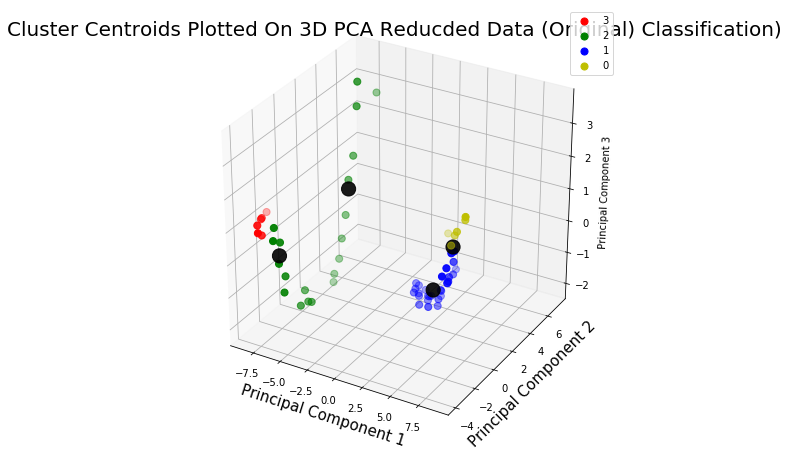

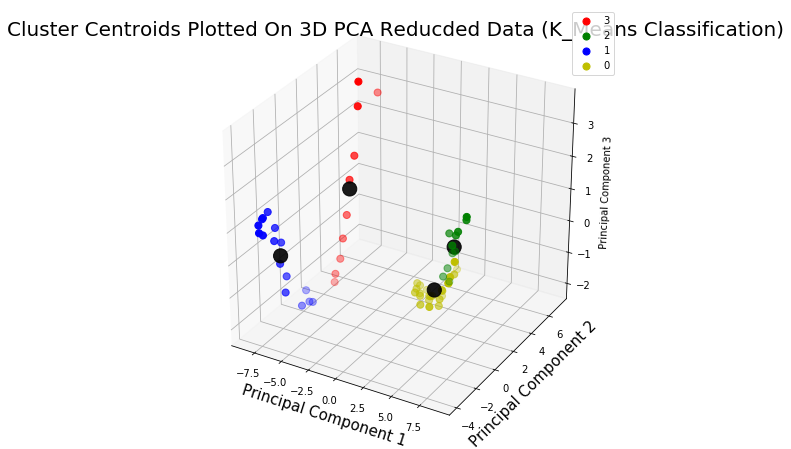

In [24]:
#try the above code except pca before clustering 

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML

from sklearn.metrics import adjusted_rand_score

disim_matrix = np.loadtxt("disim_matrix2.csv", delimiter=",")

display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")



num_ind = disim_matrix.shape[0]


Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
#Y = np.vstack ((np.zeros((albanianlabels,1)), np.ones((greeklabels,1)),2*np.ones((japaneselabels,1)),3*np.ones((koreanlabels,1))))

disim_matrix = StandardScaler().fit_transform(disim_matrix) 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(disim_matrix)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(disim_matrix)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")


tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


centers = kmeans.cluster_centers_

Y_P = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 


finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3')
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()




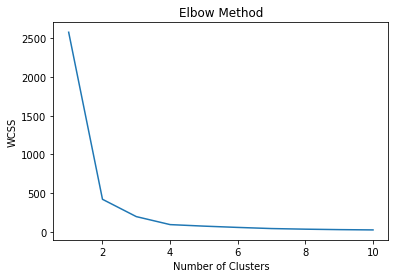

Specify number of clusters to be used 4

Cluster Assignments Are: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3]


Clustering accuracy is : 55.73770491803278
An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth
Adjusted Random Score : 0.6039149097794547
Adjusted Random Score As Percentage Is : 80.19574548897273


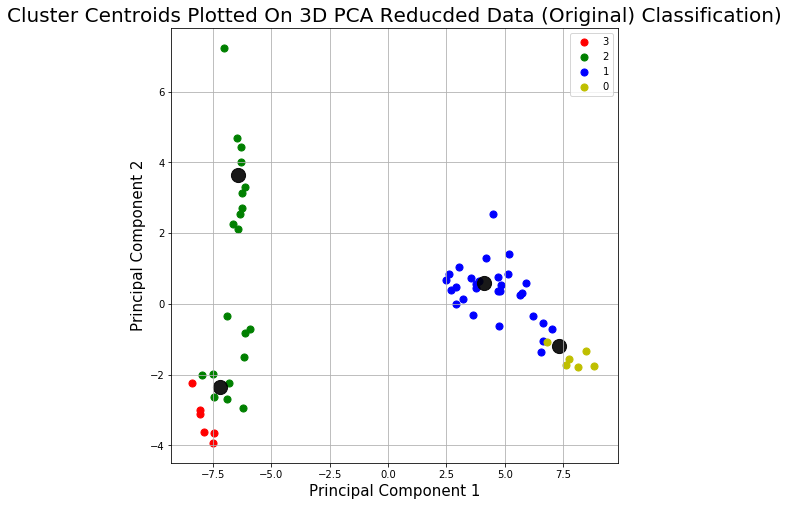

Total Sum of Squares Is : 0.04423773730914793
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
(61, 11)
(61, 10)
(61, 24)
(61, 16)



Number of Albanians 11
Number of Greek 10
Number of Japanese 24
Number of Korean 16
Albanian SS_WP is : 0.024292957505353697
Greek SS_WP is : 0.020364949471494677
Japanese SS_WP is : 0.08552029987811928
Korean SS_WP is : 0.010946421969332713
K - Means Total Sum of Squares Within Populations Is : 0.14112462882430038
K - Means Sum of Squares Among Populations Is : -0.09688689151515245



[3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
(61, 6)
(61, 20)
(61, 29)
(61, 6)
Number of Albanians 6
Number of Greek 20
Number of Japanese 29
Number of Korean 6
Albanian SS_WP is : 0.004767617031974967
G

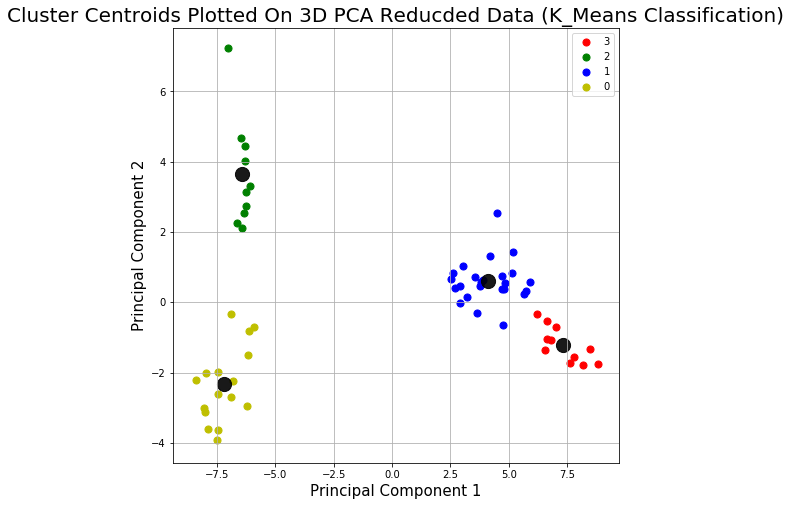

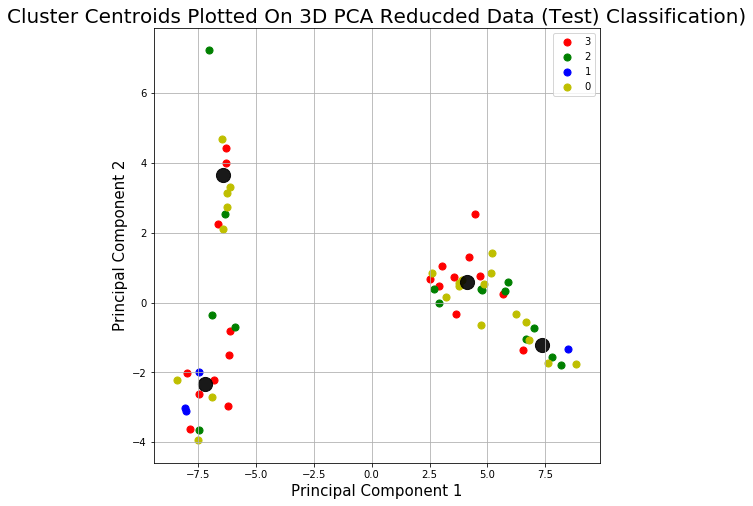

In [49]:
#start with this code for troubelshooting 

#heres where i calculate ssap of the clustering solution and original solutions

import sys
import os
import pandas as pd
import numpy as np
import six
import time
import pathlib
import copy
import numpy.matlib 
import sklearn
import random
from numpy.random import randint
import math


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML

from sklearn.metrics import adjusted_rand_score

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")

disim_matrix = np.loadtxt("disim_matrix2.csv", delimiter=",")

display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)





num_ind = disim_matrix.shape[0]

albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))

#Y = np.vstack ((np.zeros((albanianlabels,1)), np.ones((greeklabels,1)),2*np.ones((japaneselabels,1)),3*np.ones((koreanlabels,1))))

disim_matrix2 = StandardScaler().fit_transform(disim_matrix) 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(disim_matrix2)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

n_clusters=input("Specify number of clusters to be used ")
n_clusters=int(n_clusters)

kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principalComponents)
print("\nCluster Assignments Are: \n\n"+ str(pred_y) + "\n")


tcorrect_counter = 0

for i in range(len(pred_y)):
    test_equality  = np.equal(Y[i], pred_y[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nClustering accuracy is : " + str(test_accuracy))

ari_kmeans = adjusted_rand_score(Y.reshape(len(pred_y), ), kmeans.labels_)

print("An Adjusted Random Score Is 0 if Labeling Is Random & 1 If Labeling is Completely Accurate To A Ground Truth")

print("Adjusted Random Score : " + str(ari_kmeans))

print("Adjusted Random Score As Percentage Is : " + str(((ari_kmeans+1)/2)*100))


centers = kmeans.cluster_centers_

Y_P = pd.DataFrame(Y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Original) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pred_yp = pred_y.reshape(num_ind,1)
pred_yp = pd.DataFrame(pred_yp, columns=['target']) 


finalDf = pd.concat([principalDf, pred_yp[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (K_Means Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()
#print("test")
#print(type(disim_matrix))
#print(np.shape(disim_matrix))


ss_t = (np.sum(disim_matrix*disim_matrix))/(2*num_ind)

print("Total Sum of Squares Is : " + str(ss_t))

pred_y2 = pred_y.tolist()

print(pred_y2)

albanian_indices = []
greek_indices = []
japan_indices = []
korean_indices = []

for i in range(0, len(pred_y2))  :
    
    if (pred_y2[i] == 3):
        
        albanian_indices.append(i)
    
    if (pred_y2[i] == 2):
        
        greek_indices.append(i)
        
    if (pred_y2[i] == 1):
        
        japan_indices.append(i)
        
    if (pred_y2[i] == 0):
        
        korean_indices.append(i)
        

#print(albanian_indices)
#print(len(albanian_indices))

#print(len(greek_indices))
#print(greek_indices)
#print(japan_indices)
#print(len(japan_indices))
#print(korean_indices)
#print(len(korean_indices))

albanian_data = disim_matrix[:, albanian_indices]
print(np.shape(albanian_data))
np.savetxt("albanian_ss.csv", albanian_data, delimiter=",")

greek_data = disim_matrix[:, greek_indices]
print(np.shape(greek_data))
np.savetxt("greek_ss.csv", greek_data, delimiter=",")

japan_data = disim_matrix[:, japan_indices]
print(np.shape(japan_data))
np.savetxt("japan_ss.csv", japan_data, delimiter=",")

korean_data = disim_matrix[:, korean_indices]
print(np.shape(korean_data))
np.savetxt("korean_ss.csv", korean_data, delimiter=",")

print("\n\n")
num_albanians = albanian_data.shape[1]
print("Number of Albanians " + str(num_albanians))
num_greeks = greek_data.shape[1]
print("Number of Greek " + str(num_greeks))
num_japanese = japan_data.shape[1]
print("Number of Japanese " + str(num_japanese))
num_korean = korean_data.shape[1]
print("Number of Korean " + str(num_korean))

albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

print("Albanian SS_WP is : " + str(albanian_wp))

greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

print("Greek SS_WP is : " + str(greek_wp))

japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

print("Japanese SS_WP is : " + str(japan_wp) )

korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

print("Korean SS_WP is : " + str(korean_wp) )

ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp

#ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

print("K - Means Total Sum of Squares Within Populations Is : " + str(ss_wp))

ss_ap = ss_t - ss_wp

print("K - Means Sum of Squares Among Populations Is : " + str(ss_ap))
print("\n\n")


albanian_indices = []
greek_indices = []
japan_indices = []
korean_indices = []
Y = Y.ravel()
Y2 = Y.astype(int).tolist()

print(Y2)

for i in range(0, len(Y2))  :
    
    if (Y2[i] == 3):
        
        albanian_indices.append(i)
    
    if (Y2[i] == 2):
        
        greek_indices.append(i)
        
    if (Y2[i] == 1):
        
        japan_indices.append(i)
        
    if (Y2[i] == 0):
        korean_indices.append(i)
        
albanian_data = disim_matrix[:, albanian_indices]
print(np.shape(albanian_data))

greek_data = disim_matrix[:, greek_indices]
print(np.shape(greek_data))

japan_data = disim_matrix[:, japan_indices]
print(np.shape(japan_data))

korean_data = disim_matrix[:, korean_indices]
print(np.shape(korean_data))

num_albanians = albanian_data.shape[1]
print("Number of Albanians " + str(num_albanians))
num_greeks = greek_data.shape[1]
print("Number of Greek " + str(num_greeks))
num_japanese = japan_data.shape[1]
print("Number of Japanese " + str(num_japanese))
num_korean = korean_data.shape[1]
print("Number of Korean " + str(num_korean))

albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

print("Albanian SS_WP is : " + str(albanian_wp))

greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

print("Greek SS_WP is : " + str(greek_wp))

japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

print("Japanese SS_WP is : " + str(japan_wp) )

korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

print("Korean SS_WP is : " + str(korean_wp) )

ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp
#ss_wp2 = (((np.sum(albanian_data2*albanian_data2)))/(2*num_albanians2)) + (((np.sum(greek_data2*greek_data2)))/(2*num_greeks2)) + (((np.sum(japan_data2*japan_data2)))/(2*num_japanese2))+ (((np.sum(korean_data2*korean_data2)))/(2*num_korean2))

print("Original Classification Sum of Squares Within Populations Is : " + str(ss_wp))

ss_ap = ss_t - ss_wp

print("Original Classification Sum of Squares Among Populations Is : " + str(ss_ap))

print("\n\n")

for z in range(0, 200000):
    
    Y_test = []
    
    for i in range(0, num_ind) :
        
        Y_test.append(randint(0,4))
        
    albanian_indices = []
    greek_indices = []
    japan_indices = []
    korean_indices = []

    for i in range(0, len(Y_test))  :
    
        if (Y_test[i] == 3):
        
            albanian_indices.append(i)
    
        if (Y_test[i] == 2):
        
            greek_indices.append(i)
        
        if (Y_test[i] == 1):
        
            japan_indices.append(i)
        
        if (Y_test[i] == 0):
        
            korean_indices.append(i)
        

    albanian_data = disim_matrix[:, albanian_indices]


    greek_data = disim_matrix[:, greek_indices]


    japan_data = disim_matrix[:, japan_indices]


    korean_data = disim_matrix[:, korean_indices]


    num_albanians = albanian_data.shape[1]
   # print("Number of Albanians " + str(num_albanians))
    num_greeks = greek_data.shape[1]
   # print("Number of Greek " + str(num_greeks))
    num_japanese = japan_data.shape[1]
   # print("Number of Japanese " + str(num_japanese))
    num_korean = korean_data.shape[1]
   # print("Number of Korean " + str(num_korean))

    albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

   # print("Albanian SS_WP is : " + str(albanian_wp))

    greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

    #print("Greek SS_WP is : " + str(greek_wp))

    japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

   # print("Japanese SS_WP is : " + str(japan_wp) )

    korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

   # print("Korean SS_WP is : " + str(korean_wp) )

    ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp
    
    #ss_wp3 = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

    ss_ap = ss_t - ss_wp

    if(z == 0):
        best_ssap = ss_ap

    if (ss_ap > best_ssap):
  
#    if (math.isclose(ss_ap, 0)):
        
        best_ssap = ss_ap
        best_y = Y_test

print("\nBest Answer Found \n" +str(best_y))
#print(type(best_y))
print("Best SSAP Score : " + str(best_ssap))

Y_P = pd.DataFrame(best_y, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Test) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()


Total Sum of Squares Is 0.04423773730914793

Shape of Combined Data is (61, 531002)


20
6
Best SSAP Score Is -0.118098609474559

Clustering accuracy is : 18.0327868852459

Best SSAP Score Is -0.1078882200300817

Clustering accuracy is : 29.508196721311474

Best SSAP Score Is -0.10735172342156565

Clustering accuracy is : 13.114754098360656

Best SSAP Score Is -0.10630028738868028

Clustering accuracy is : 9.836065573770492

Best SSAP Score Is -0.10475991522524897

Clustering accuracy is : 26.229508196721312

Best SSAP Score Is -0.10244447825294825

Clustering accuracy is : 24.59016393442623

Best SSAP Score Is -0.10145874158994911

Clustering accuracy is : 32.78688524590164

Best SSAP Score Is -0.09914852242597555

Clustering accuracy is : 21.311475409836063

Best SSAP Score Is -0.09494428942707478

Clustering accuracy is : 31.147540983606557



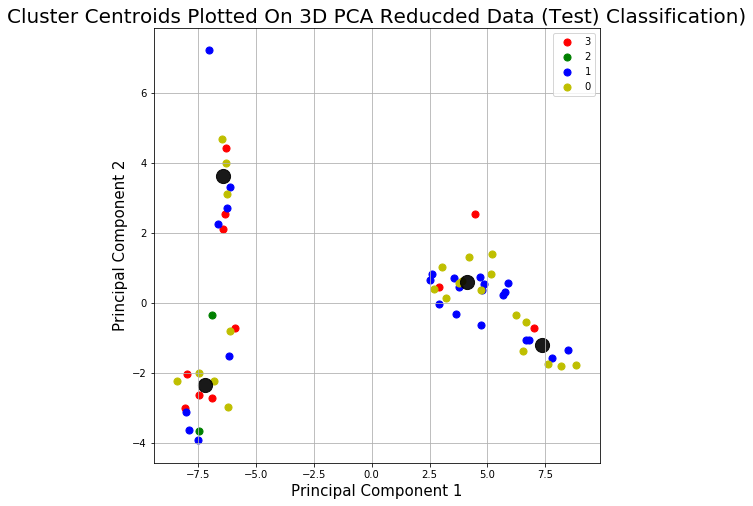

Best SSAP Score Was -0.09494428942707478

The Cluster Solution Was Found to be [1, 1, 3, 0, 1, 2, 3, 3, 0, 3, 0, 0, 2, 1, 0, 3, 1, 3, 3, 1, 0, 1, 0, 1, 3, 0, 1, 0, 1, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0]

Final Clustering accuracy is : 31.147540983606557


In [79]:
#GA with V matrix from the code or dissim2.csv

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML

from sklearn.metrics import adjusted_rand_score


display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")


#GA 


albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

num_ind = combined_data.shape[0]

disim_matrix = np.loadtxt("disim_matrix2.csv", delimiter=",")

ss_t = (np.sum(disim_matrix*disim_matrix))/(2*num_ind)

print("Total Sum of Squares Is " + str(ss_t))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

num_clusters = 4

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]
print(greeklabels)
print(albanianlabels)

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
Y = Y.reshape(num_ind , )
Y = Y.astype(int)

mutated_ypop = []

for i in range(0 , 200): 
    

    num_mutations = randint(0, 10)    #number of individual cluster assingments mutated is random
            
    for c in range(0, num_mutations):
            
        bit_mutations = randint(0, num_ind)
        
        offspring = Y.copy()    
        offspring - offspring.tolist()
        
        offspring[bit_mutations] = randint(0,num_clusters)  
        #print(offspring)
        mutated_ypop.append(offspring)

initmutated_solution_ssap = []
initmutated_solutions = mutated_ypop
     

for d in range(0, len(mutated_ypop)):        
      
    
    #np.savetxt("final_population.csv", final_population, delimiter=",")

    albanian_indices = []
    greek_indices = []
    japan_indices = []
    korean_indices = []
    
   
    #initmutated_solutions = [int(i) for i in initmutated_solutions] 
    #print("Check Format of initmutated solution")
    #print(type(initmutated_solutions))
    #print(np.shape(initmutated_solutions))
    #print(initmutated_solutions[0][:])
    #print(len(mutated_ypop))
    
    initmutated_solutions2 = initmutated_solutions[d][:]
    initmutated_solutions2 = [int(i) for i in initmutated_solutions2] 

    for i in range(0, num_ind)  :
    
        if (initmutated_solutions2[i] == 3):
            
            albanian_indices.append(i)
    
        if (initmutated_solutions2[i] == 2):
        
            greek_indices.append(i)
        
        if (initmutated_solutions2[i] == 1):
        
            japan_indices.append(i)
        
        if (initmutated_solutions2[i] == 0):
        
            korean_indices.append(i)
        

    albanian_data = disim_matrix[:, albanian_indices]
    #albanian_data = albanian_data[albanian_indices, :]
    greek_data = disim_matrix[:, greek_indices]
    #greek_data = greek_data[greek_indices, :]
    japan_data = disim_matrix[:, japan_indices]
    #japan_data = japan_data[japan_indices, :]
    korean_data = disim_matrix[:, korean_indices]
    #korean_data = korean_data[korean_indices, :]

    num_albanians = albanian_data.shape[1]
    num_greeks = greek_data.shape[1]
    num_japanese = japan_data.shape[1]
    num_korean = korean_data.shape[1]

    #ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))
    
    albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

   # print("Albanian SS_WP is : " + str(albanian_wp))

    greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

    #print("Greek SS_WP is : " + str(greek_wp))

    japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

   # print("Japanese SS_WP is : " + str(japan_wp) )

    korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

   # print("Korean SS_WP is : " + str(korean_wp) )

    ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp
    
    ss_ap = ss_t - ss_wp
        
    initmutated_solution_ssap.append(ss_ap)             #score
    


final_solutions = []
final_solution_ssap = []

for h in range (0, 1000):    #iterate genetic algorithm over 200 populations
    
    solutions = []
    solution_ssap = []
    offspring =[]
    
    for z in range(0, 300):  #generate 300 random guesses at cluster solution
    
        population = []

        for x in range (0, num_ind):

            population.append(randint(0, num_clusters))  
            
        

        #population = np.asarray(population)               #randomly assign clustering

        albanian_indices = []
        greek_indices = []
        japan_indices = []
        korean_indices = []
        
        population = [int(i) for i in population] 

        for i in range(0, num_ind)  :

            if (population[i] == 3):

                albanian_indices.append(i)

            if (population[i] == 2):

                greek_indices.append(i)

            if (population[i] == 1):

                japan_indices.append(i)

            if (population[i] == 0):

                korean_indices.append(i)
        

        albanian_data = disim_matrix[:, albanian_indices]    #pull corresponding cluster matrix data for distances
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]     

        num_albanians = albanian_data.shape[1]
        num_greeks = greek_data.shape[1]
        num_japanese = japan_data.shape[1]
        num_korean = korean_data.shape[1]

#ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

       # print("Albanian SS_WP is : " + str(albanian_wp))

        greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

        #print("Greek SS_WP is : " + str(greek_wp))

        japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

       # print("Japanese SS_WP is : " + str(japan_wp) )

        korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

       # print("Korean SS_WP is : " + str(korean_wp) )

        ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp

        ss_ap = ss_t - ss_wp
        
        solutions.append(population)   #list of cluster assignments
        solution_ssap.append(ss_ap)             # ssap scores
    
    
    if ( h == 0 ) :                            # if first iteration mutate known truth and add into inital population selection with random guesses
        
        solutions = solutions + initmutated_solutions
        solutions_ssap = solution_ssap + initmutated_solution_ssap
    
    
    if ( h > 0 ) :   #If not first iteration the mutated offspring population gets put into the population with random assignments

        solutions = solutions+final_solutions
        solutions_ssap = solution_ssap + final_solution_ssap
        final_solutions =[]
        final_solution_ssap = []

        

    num_kept_solutions = 75
    selected_indices = sorted(range(len(solution_ssap)), key = lambda sub: solution_ssap[sub])[-num_kept_solutions:]   # get indices of best 75 ssap scores
    selected_indices = np.asarray(selected_indices)
    #solutions =  np.asarray(solutions)
    #print("solutions check")
    #print(type(solutions))
    #print(np.shape(solutions))
    #print("selected indices check")
    #print(type(selected_indices))
    #print(np.shape(selected_indices))
    selected_indices = selected_indices.ravel()
    selected_indices = selected_indices.tolist()
    selected_indices = [int(i) for i in selected_indices] 
    selected_clusters =[]
   
    for i in range(0, num_kept_solutions):
    
        selected_clusters.append(solutions[selected_indices[i]][:])    #get corresponding cluster assignments with best 75 ssap scores
    
    for a in range(0, len(selected_clusters)):             #single point cross over
    
        cross_point = randint(0,num_ind)                   #random crossover point    
        rand_parent = randint(0,num_kept_solutions)
        parent1 = selected_clusters[a][:]                  #each cluster assignment gets to mate
        parent2 = selected_clusters[rand_parent][:]        #who they mate with is random
        
        parent1 = np.asarray(parent1)
        parent2 = np.asarray(parent2)
        offspring1 = np.append(parent1[:cross_point], parent2[cross_point:])        #two offspring produced from crossover point
        offspring2 = np.append(parent2[:cross_point], parent1[cross_point:])
        offspring.append(offspring1.tolist())
        offspring.append(offspring2.tolist())

    
    for b in range(0, len(offspring)):
        
        mutation_prob = randint(0, 5)  #20 percent chance of mutation 1/5
        
        if mutation_prob == 1 :      
            
            num_mutations = randint(0, num_ind/10)    #number of individual cluster assingments mutated is random
            
            for c in range(0, num_mutations):
            
                bit_mutations = randint(0, num_ind)
            
                offspring[b][bit_mutations] = randint(0,num_clusters)  

    #Evaluate mutated offspring
    
    #print("Check Format of Offspring")
    #print(type(offspring))
    #print(np.shape(offspring))
    
    for d in range(0, len(offspring)):
        
        #final_population = np.asarray(offspring)
        offspringtemp = offspring[d][:]
        offspringtemp = [int(i) for i in offspringtemp] 
        final_population = offspringtemp
        
      
        #np.savetxt("final_population.csv", final_population, delimiter=",")

        albanian_indices = []
        greek_indices = []
        japan_indices = []
        korean_indices = []

        for i in range(0, num_ind)  :

            if (final_population[i] == 3):

                albanian_indices.append(i)

            if (final_population[i] == 2):

                greek_indices.append(i)

            if (final_population[i] == 1):

                japan_indices.append(i)

            if (final_population[i] == 0):

                korean_indices.append(i)
        

        albanian_data = disim_matrix[:, albanian_indices]
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]

        num_albanians = albanian_data.shape[1]
        num_greeks = greek_data.shape[1]
        num_japanese = japan_data.shape[1]
        num_korean = korean_data.shape[1]

        #ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

       # print("Albanian SS_WP is : " + str(albanian_wp))

        greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

        #print("Greek SS_WP is : " + str(greek_wp))

        japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

       # print("Japanese SS_WP is : " + str(japan_wp) )

        korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

       # print("Korean SS_WP is : " + str(korean_wp) )

        ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp        
        
        ss_ap = ss_t - ss_wp
        
       # print("SSAP DEBUG" + str(ss_ap))
        
        final_solutions.append(final_population)
        final_solution_ssap.append(ss_ap)             #scores
    
    final_solution_ssap2 = np.asarray(final_solution_ssap)
    max_index = np.argmax(final_solution_ssap2, axis=0)   #find index of where ssap score is highest
    
    
    if ( h == 1):
        
        best_ssap = ss_ap
    
    
    if (final_solution_ssap[max_index] > best_ssap):     #compare to current best answer
        best_ssap = final_solution_ssap[max_index]
        print("Best SSAP Score Is " + str(final_solution_ssap[max_index]))
        cluster_solution =[]
        cluster_solution = final_solutions[max_index][:]
        
        #test accuracy of answer

        Y_test = Y.tolist()
        
 #       Y_test = sum(Y_test, []) 
 #       Y_test = sum(Y_test)
#        Y_test = [int(i) for i in Y_test] 
        
        correct_counter = 0
        for e in range(0, num_ind):
            if(Y_test[e] == cluster_solution[e]):
                correct_counter+=1
        
 
        accuracy = (correct_counter/num_ind)*100    

        print("\nClustering accuracy is : " + str(accuracy) +"\n")       

Y_P = pd.DataFrame(cluster_solution, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Test) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()
        
    
print("Best SSAP Score Was " + str(best_ssap))    
print("\nThe Cluster Solution Was Found to be " + str(cluster_solution))

tcorrect_counter = 0

for i in range(num_ind):
    #test_equality  = np.equal(Y[i], cluster_solution[i]) 

    if(Y[i] == cluster_solution[i]):
        
        tcorrect_counter+=1
    
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nFinal Clustering accuracy is : " + str(test_accuracy))
    


Total Sum of Squares Is 5.06909177015825

Shape of Combined Data is (61, 531002)


20
6
Best SSAP Score Is -15.071424353625732

Clustering accuracy is : 18.0327868852459

Best SSAP Score Is -15.070162285452577

Clustering accuracy is : 18.0327868852459

Best SSAP Score Is -15.066489711037713

Clustering accuracy is : 22.950819672131146

Best SSAP Score Is -15.066018998713242

Clustering accuracy is : 13.114754098360656

Best SSAP Score Is -15.032304948727683

Clustering accuracy is : 32.78688524590164

Best SSAP Score Is -14.962017806092875

Clustering accuracy is : 26.229508196721312

Best SSAP Score Is -14.799245888047091

Clustering accuracy is : 22.950819672131146



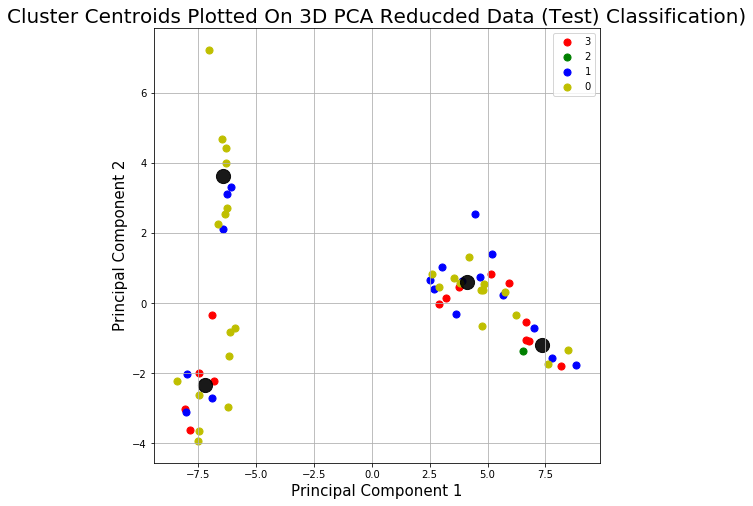

Best SSAP Score Was -14.799245888047091

The Cluster Solution Was Found to be [3, 1, 3, 0, 0, 0, 1, 0, 3, 1, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 1, 0, 0, 3, 2, 3, 3, 1, 3, 0, 1, 3, 0, 1]

Final Clustering accuracy is : 22.950819672131146


In [80]:
#GA with D matrix from the code or dissim1.csv

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML

from sklearn.metrics import adjusted_rand_score


display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")


#GA 


albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

num_ind = combined_data.shape[0]

disim_matrix = np.loadtxt("disim_matrix.csv", delimiter=",")

ss_t = (np.sum(disim_matrix*disim_matrix))/(2*num_ind)

print("Total Sum of Squares Is " + str(ss_t))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

num_clusters = 4

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]
print(greeklabels)
print(albanianlabels)

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
Y = Y.reshape(num_ind , )
Y = Y.astype(int)

mutated_ypop = []

for i in range(0 , 200): 
    

    num_mutations = randint(0, 3)    #number of individual cluster assingments mutated is random
            
    for c in range(0, num_mutations):
            
        bit_mutations = randint(0, num_ind)
        
        offspring = Y.copy()    
        offspring - offspring.tolist()
        
        offspring[bit_mutations] = randint(0,num_clusters)  
        #print(offspring)
        mutated_ypop.append(offspring)

initmutated_solution_ssap = []
initmutated_solutions = mutated_ypop
     

for d in range(0, len(mutated_ypop)):        
      
    
    #np.savetxt("final_population.csv", final_population, delimiter=",")

    albanian_indices = []
    greek_indices = []
    japan_indices = []
    korean_indices = []
    
   
    #initmutated_solutions = [int(i) for i in initmutated_solutions] 
    #print("Check Format of initmutated solution")
    #print(type(initmutated_solutions))
    #print(np.shape(initmutated_solutions))
    #print(initmutated_solutions[0][:])
    #print(len(mutated_ypop))
    
    initmutated_solutions2 = initmutated_solutions[d][:]
    initmutated_solutions2 = [int(i) for i in initmutated_solutions2] 

    for i in range(0, num_ind)  :
    
        if (initmutated_solutions2[i] == 3):
            
            albanian_indices.append(i)
    
        if (initmutated_solutions2[i] == 2):
        
            greek_indices.append(i)
        
        if (initmutated_solutions2[i] == 1):
        
            japan_indices.append(i)
        
        if (initmutated_solutions2[i] == 0):
        
            korean_indices.append(i)
        

    albanian_data = disim_matrix[:, albanian_indices]
    #albanian_data = albanian_data[albanian_indices, :]
    greek_data = disim_matrix[:, greek_indices]
    #greek_data = greek_data[greek_indices, :]
    japan_data = disim_matrix[:, japan_indices]
    #japan_data = japan_data[japan_indices, :]
    korean_data = disim_matrix[:, korean_indices]
    #korean_data = korean_data[korean_indices, :]

    num_albanians = albanian_data.shape[1]
    num_greeks = greek_data.shape[1]
    num_japanese = japan_data.shape[1]
    num_korean = korean_data.shape[1]

    #ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))
    
    albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

   # print("Albanian SS_WP is : " + str(albanian_wp))

    greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

    #print("Greek SS_WP is : " + str(greek_wp))

    japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

   # print("Japanese SS_WP is : " + str(japan_wp) )

    korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

   # print("Korean SS_WP is : " + str(korean_wp) )

    ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp
    
    ss_ap = ss_t - ss_wp
        
    initmutated_solution_ssap.append(ss_ap)             #score
    


final_solutions = []
final_solution_ssap = []

for h in range (0, 1000):    #iterate genetic algorithm over 200 populations
    
    solutions = []
    solution_ssap = []
    offspring =[]
    
    for z in range(0, 300):  #generate 300 random guesses at cluster solution
    
        population = []

        for x in range (0, num_ind):

            population.append(randint(0, num_clusters))  
            
        

        #population = np.asarray(population)               #randomly assign clustering

        albanian_indices = []
        greek_indices = []
        japan_indices = []
        korean_indices = []
        
        population = [int(i) for i in population] 

        for i in range(0, num_ind)  :

            if (population[i] == 3):

                albanian_indices.append(i)

            if (population[i] == 2):

                greek_indices.append(i)

            if (population[i] == 1):

                japan_indices.append(i)

            if (population[i] == 0):

                korean_indices.append(i)
        

        albanian_data = disim_matrix[:, albanian_indices]    #pull corresponding cluster matrix data for distances
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]     

        num_albanians = albanian_data.shape[1]
        num_greeks = greek_data.shape[1]
        num_japanese = japan_data.shape[1]
        num_korean = korean_data.shape[1]

#ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

       # print("Albanian SS_WP is : " + str(albanian_wp))

        greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

        #print("Greek SS_WP is : " + str(greek_wp))

        japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

       # print("Japanese SS_WP is : " + str(japan_wp) )

        korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

       # print("Korean SS_WP is : " + str(korean_wp) )

        ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp

        ss_ap = ss_t - ss_wp
        
        solutions.append(population)   #list of cluster assignments
        solution_ssap.append(ss_ap)             # ssap scores
    
    
    if ( h == 0 ) :                            # if first iteration mutate known truth and add into inital population selection with random guesses
        
        solutions = solutions + initmutated_solutions
        solutions_ssap = solution_ssap + initmutated_solution_ssap
    
    
    if ( h > 0 ) :   #If not first iteration the mutated offspring population gets put into the population with random assignments

        solutions = solutions+final_solutions
        solutions_ssap = solution_ssap + final_solution_ssap
        final_solutions =[]
        final_solution_ssap = []

        

    num_kept_solutions = 75
    selected_indices = sorted(range(len(solution_ssap)), key = lambda sub: solution_ssap[sub])[-num_kept_solutions:]   # get indices of best 75 ssap scores
    selected_indices = np.asarray(selected_indices)
    #solutions =  np.asarray(solutions)
    #print("solutions check")
    #print(type(solutions))
    #print(np.shape(solutions))
    #print("selected indices check")
    #print(type(selected_indices))
    #print(np.shape(selected_indices))
    selected_indices = selected_indices.ravel()
    selected_indices = selected_indices.tolist()
    selected_indices = [int(i) for i in selected_indices] 
    selected_clusters =[]
   
    for i in range(0, num_kept_solutions):
    
        selected_clusters.append(solutions[selected_indices[i]][:])    #get corresponding cluster assignments with best 75 ssap scores
    
    for a in range(0, len(selected_clusters)):             #single point cross over
    
        cross_point = randint(0,num_ind)                   #random crossover point    
        rand_parent = randint(0,num_kept_solutions)
        parent1 = selected_clusters[a][:]                  #each cluster assignment gets to mate
        parent2 = selected_clusters[rand_parent][:]        #who they mate with is random
        
        parent1 = np.asarray(parent1)
        parent2 = np.asarray(parent2)
        offspring1 = np.append(parent1[:cross_point], parent2[cross_point:])        #two offspring produced from crossover point
        offspring2 = np.append(parent2[:cross_point], parent1[cross_point:])
        offspring.append(offspring1.tolist())
        offspring.append(offspring2.tolist())

    
    for b in range(0, len(offspring)):
        
        mutation_prob = randint(0, 5)  #20 percent chance of mutation 1/5
        
        if mutation_prob == 1 :      
            
            num_mutations = randint(0, num_ind/10)    #number of individual cluster assingments mutated is random
            
            for c in range(0, num_mutations):
            
                bit_mutations = randint(0, num_ind)
            
                offspring[b][bit_mutations] = randint(0,num_clusters)  

    #Evaluate mutated offspring
    
    #print("Check Format of Offspring")
    #print(type(offspring))
    #print(np.shape(offspring))
    
    for d in range(0, len(offspring)):
        
        #final_population = np.asarray(offspring)
        offspringtemp = offspring[d][:]
        offspringtemp = [int(i) for i in offspringtemp] 
        final_population = offspringtemp
        
      
        #np.savetxt("final_population.csv", final_population, delimiter=",")

        albanian_indices = []
        greek_indices = []
        japan_indices = []
        korean_indices = []

        for i in range(0, num_ind)  :

            if (final_population[i] == 3):

                albanian_indices.append(i)

            if (final_population[i] == 2):

                greek_indices.append(i)

            if (final_population[i] == 1):

                japan_indices.append(i)

            if (final_population[i] == 0):

                korean_indices.append(i)
        

        albanian_data = disim_matrix[:, albanian_indices]
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]

        num_albanians = albanian_data.shape[1]
        num_greeks = greek_data.shape[1]
        num_japanese = japan_data.shape[1]
        num_korean = korean_data.shape[1]

        #ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        albanian_wp = ((np.sum(albanian_data*albanian_data)))/(2*num_albanians) 

       # print("Albanian SS_WP is : " + str(albanian_wp))

        greek_wp = ((np.sum(greek_data*greek_data)))/(2*num_greeks) 

        #print("Greek SS_WP is : " + str(greek_wp))

        japan_wp = ((np.sum(japan_data*japan_data)))/(2*num_japanese) 

       # print("Japanese SS_WP is : " + str(japan_wp) )

        korean_wp = ((np.sum(korean_data*korean_data)))/(2*num_korean) 

       # print("Korean SS_WP is : " + str(korean_wp) )

        ss_wp = albanian_wp + greek_wp + japan_wp + korean_wp        
        
        ss_ap = ss_t - ss_wp
        
       # print("SSAP DEBUG" + str(ss_ap))
        
        final_solutions.append(final_population)
        final_solution_ssap.append(ss_ap)             #scores
    
    final_solution_ssap2 = np.asarray(final_solution_ssap)
    max_index = np.argmax(final_solution_ssap2, axis=0)   #find index of where ssap score is highest
    
    
    if ( h == 1):
        
        best_ssap = ss_ap
    
    
    if (final_solution_ssap[max_index] > best_ssap):     #compare to current best answer
        best_ssap = final_solution_ssap[max_index]
        print("Best SSAP Score Is " + str(final_solution_ssap[max_index]))
        cluster_solution =[]
        cluster_solution = final_solutions[max_index][:]
        
        #test accuracy of answer

        Y_test = Y.tolist()
        
 #       Y_test = sum(Y_test, []) 
 #       Y_test = sum(Y_test)
#        Y_test = [int(i) for i in Y_test] 
        
        correct_counter = 0
        for e in range(0, num_ind):
            if(Y_test[e] == cluster_solution[e]):
                correct_counter+=1
        
 
        accuracy = (correct_counter/num_ind)*100    

        print("\nClustering accuracy is : " + str(accuracy) +"\n")       

Y_P = pd.DataFrame(cluster_solution, columns=['target']) 

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y_P[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title("Cluster Centroids Plotted On 3D PCA Reducded Data (Test) Classification)", fontsize = 20)
#targets = ['Albanian', 'Greek']
targets = [3,2,1,0]
colors = ['r', 'g','b','y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);
ax.legend(targets)
ax.grid()

plt.show()
        
    
print("Best SSAP Score Was " + str(best_ssap))    
print("\nThe Cluster Solution Was Found to be " + str(cluster_solution))

tcorrect_counter = 0

for i in range(num_ind):
    #test_equality  = np.equal(Y[i], cluster_solution[i]) 

    if(Y[i] == cluster_solution[i]):
        
        tcorrect_counter+=1
    
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nFinal Clustering accuracy is : " + str(test_accuracy))
    

In [51]:
#disregard this code for now

#GA

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy.random import randint
from random import random 
# read in already cleaned/matched data from previous code

import sys
import os
import xlrd as xl
import pandas as pd
import openpyxl
import numpy as np
from openpyxl import load_workbook
from pandas import ExcelWriter
import six
import time
import pathlib
import copy
import numpy.matlib 


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import distance

import pprint as p
import os
from IPython.core.display import display, HTML

from sklearn.metrics import adjusted_rand_score


display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=np.inf)

os.chdir(r"C:\Users\gjhaa\Desktop\Masters_Project\Matched_Datasets")


#GA 


albanian = np.loadtxt("albanian.csv", delimiter=',')
greek = np.loadtxt("greek.csv", delimiter=',')
japanese  = np.loadtxt("japanese.csv", delimiter=',')
korean = np.loadtxt("korean.csv", delimiter=',')

combined_data=np.vstack((albanian,greek,japanese,korean))

num_ind = combined_data.shape[0]

disim_matrix = np.loadtxt("disim_matrix2.csv", delimiter=",")

ss_t = (np.sum(disim_matrix*disim_matrix))/(2*num_ind)

print("Total Sum of Squares Is " + str(ss_t))

print("\nShape of Combined Data is " + str(np.shape(combined_data)))
print("\n")

num_ind = combined_data.shape[0]

num_clusters = 4

greeklabels = greek.shape[0]
albanianlabels = albanian.shape[0]
japaneselabels = japanese.shape[0]
koreanlabels = korean.shape[0]
print(greeklabels)
print(albanianlabels)

Y = np.vstack ((3*np.ones((albanianlabels,1)), 2*np.ones((greeklabels,1)),np.ones((japaneselabels,1)),np.zeros((koreanlabels,1))))
Y = Y.reshape(num_ind , )
Y = Y.astype(int)

mutated_ypop = []

for i in range(0 , 200): 
    

    num_mutations = randint(0, num_ind/10)    #number of individual cluster assingments mutated is random
            
    for c in range(0, num_mutations):
            
        bit_mutations = randint(0, num_ind/6)
        
        offspring = Y.copy()    
        offspring - offspring.tolist()
        
        offspring[bit_mutations] = randint(0,num_clusters)  
        #print(offspring)
        mutated_ypop.append(offspring)

initmutated_solution_ssap = []
initmutated_solutions = mutated_ypop
     

for d in range(0, len(mutated_ypop)):        
      
    
    #np.savetxt("final_population.csv", final_population, delimiter=",")

    albanian_indices = np.where(initmutated_solutions[d] == 3)[0]
    greek_indices = np.where(initmutated_solutions[d] == 2)[0]
    japan_indices = np.where(initmutated_solutions[d] == 1)[0]
    korean_indices = np.where(initmutated_solutions[d] == 0)[0]

    albanian_data = disim_matrix[:, albanian_indices]
    #albanian_data = albanian_data[albanian_indices, :]
    greek_data = disim_matrix[:, greek_indices]
    #greek_data = greek_data[greek_indices, :]
    japan_data = disim_matrix[:, japan_indices]
    #japan_data = japan_data[japan_indices, :]
    korean_data = disim_matrix[:, korean_indices]
    #korean_data = korean_data[korean_indices, :]

    num_albanians = albanian_data.shape[0]
    num_greeks = greek_data.shape[0]
    num_japanese = japan_data.shape[0]
    num_korean = korean_data.shape[0]

    ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

    ss_ap = ss_t - ss_wp
        
    initmutated_solution_ssap.append(ss_ap)             #score
    

best_ssap = 0
final_solutions = []
final_solution_ssap = []

for i in range (0, 200):    #iterate genetic algorithm over 200 populations
    
    solutions = []
    solution_ssap = []
    offspring =[]
    
    for z in range(0, 300):  #generate 300 random guesses at cluster solution
    
        population = []

        for x in range (0, num_ind):

            population.append(randint(0, num_clusters))  
            
        

        population = np.asarray(population)               #randomly assign clustering

        albanian_indices = np.where(population == 3)[0]    #indices used to pull data from disim matrix based on cluster assignment
        greek_indices = np.where(population == 2)[0]
        japan_indices = np.where(population == 1)[0]
        korean_indices = np.where(population == 0)[0]

        albanian_data = disim_matrix[:, albanian_indices]    #pull corresponding cluster matrix data for distances
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]     

        num_albanians = albanian_data.shape[0]
        num_greeks = greek_data.shape[0]
        num_japanese = japan_data.shape[0]
        num_korean = korean_data.shape[0]

        ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        ss_ap = ss_t - ss_wp
        
        solutions.append(population.tolist())   #list of cluster assignments
        solution_ssap.append(ss_ap)             # ssap scores
    
    
    if ( i == 0 ) :                            # if first iteration mutate known truth and add into inital population selection with random guesses
        
        solutions = solutions + initmutated_solutions
        solutions_ssap = solution_ssap + initmutated_solution_ssap
    
    
    if ( i > 0 ) :   #If not first iteration the mutated offspring population gets put into the population with random assignments

        solutions = solutions+final_solutions
        solutions_ssap = solution_ssap + final_solution_ssap
        final_solutions =[]
        final_solution_ssap = []

        

    num_kept_solutions = 75
    selected_indices = sorted(range(len(solution_ssap)), key = lambda sub: solution_ssap[sub])[-num_kept_solutions:]   # get indices of best 75 ssap scores
    selected_indices = np.asarray(selected_indices)
    solutions =  np.asarray(solutions)
    selected_clusters = solutions[selected_indices, :]    #get corresponding cluster assignments with best 75 ssap scores
    
    for a in range(0, len(selected_clusters)):             #single point cross over
    
        cross_point = randint(0,num_ind)                   #random crossover point    
        rand_parent = randint(0,num_kept_solutions)
        parent1 = selected_clusters[a, :]                  #each cluster assignment gets to mate
        parent2 = selected_clusters[rand_parent, :]        #who they mate with is random
        
        
        offspring1 = np.append(parent1[:cross_point], parent2[cross_point:])        #two offspring produced from crossover point
        offspring2 = np.append(parent2[:cross_point], parent1[cross_point:])
        offspring.append(offspring1.tolist())
        offspring.append(offspring2.tolist())

    
    for b in range(0, len(offspring)):
        
        mutation_prob = randint(0, 5)  #20 percent chance of mutation 1/5
        
        if mutation_prob == 1 :      
            
            num_mutations = randint(0, num_ind/10)    #number of individual cluster assingments mutated is random
            
            for c in range(0, num_mutations):
            
                bit_mutations = randint(0, num_ind)
            
                offspring[b][bit_mutations] = randint(0,num_clusters)  

    #Evaluate mutated offspring
    
    for d in range(0, len(offspring)):
        
        final_population = np.asarray(offspring)
        #np.savetxt("final_population.csv", final_population, delimiter=",")

        albanian_indices = np.where(final_population[d] == 3)[0]
        greek_indices = np.where(final_population[d] == 2)[0]
        japan_indices = np.where(final_population[d] == 1)[0]
        korean_indices = np.where(final_population[d] == 0)[0]

        albanian_data = disim_matrix[:, albanian_indices]
        #albanian_data = albanian_data[albanian_indices, :]
        greek_data = disim_matrix[:, greek_indices]
        #greek_data = greek_data[greek_indices, :]
        japan_data = disim_matrix[:, japan_indices]
        #japan_data = japan_data[japan_indices, :]
        korean_data = disim_matrix[:, korean_indices]
        #korean_data = korean_data[korean_indices, :]

        num_albanians = albanian_data.shape[0]
        num_greeks = greek_data.shape[0]
        num_japanese = japan_data.shape[0]
        num_korean = korean_data.shape[0]

        ss_wp = (((np.sum(albanian_data*albanian_data)))/(2*num_albanians)) + (((np.sum(greek_data*greek_data)))/(2*num_greeks)) + (((np.sum(japan_data*japan_data)))/(2*num_japanese))+ (((np.sum(korean_data*korean_data)))/(2*num_korean))

        ss_ap = ss_t - ss_wp
        
        final_solutions = final_population.tolist()
        final_solution_ssap.append(ss_ap)             #scores
    
    max_index = np.argmax(final_solution_ssap, axis=0)   #find index of where ssap score is highest
    

    if (final_solution_ssap[max_index] > best_ssap):     #compare to current best answer
        best_ssap = final_solution_ssap[max_index]
        print("Best SSAP Score Is " + str(final_solution_ssap[max_index]))
        cluster_solution =[]
        cluster_solution = final_solutions[max_index]
        
        #test accuracy of answer

        Y_test = Y.tolist()
        
 #       Y_test = sum(Y_test, []) 
 #       Y_test = sum(Y_test)
#        Y_test = [int(i) for i in Y_test] 
        
        correct_counter = 0
        for e in range(0, num_ind):
            if(Y_test[e] == cluster_solution[e]):
                correct_counter+=1
        
 
        accuracy = (correct_counter/num_ind)*100    

        print("\nClustering accuracy is : " + str(accuracy) +"\n")       
        
    
print("Best SSAP Score Was " + str(best_ssap))    
print("\nThe Cluster Solution Was Found to be " + str(cluster_solution))

tcorrect_counter = 0

for i in range(num_ind):
    test_equality  = np.equal(Y[i], cluster_solution[i]) 

    if(all(test_equality)) :
        tcorrect_counter += 1
            
test_accuracy = (tcorrect_counter/num_ind)*100    

print("\nFinal Clustering accuracy is : " + str(test_accuracy))
    


Total Sum of Squares Is 0.04423773730914793

Shape of Combined Data is (61, 531002)


20
6
Best SSAP Score Is 6.938893903907228e-18

Clustering accuracy is : 18.0327868852459

Best SSAP Score Is 1.3877787807814457e-17

Clustering accuracy is : 24.59016393442623



KeyboardInterrupt: 